## 1. (a) plot of the cardinal functions

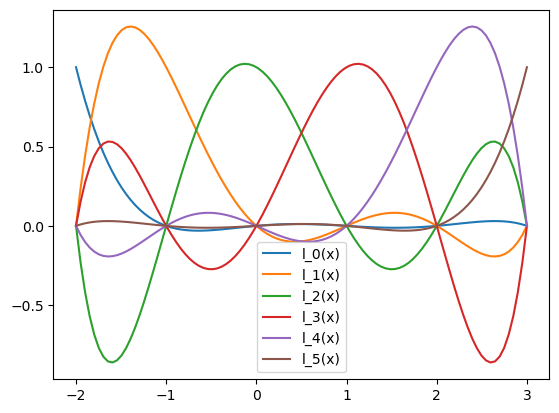

In [80]:
import numpy as np 
import matplotlib.pyplot as plt

xData = np.array([-2, -1, 0, 1, 2, 3], dtype = float)
yData = np.array([1, 4, 11, 16, 13, -4], dtype = float)

def lagrange_Polynomial(i, xData, x):
    res = np.ones(np.shape(x))
    for j in range(len(xData)):
        if j!=i:
            res*=(x-xData[j])/(xData[i] - xData[j])
    return res

xPlot = np.linspace(min(xData), max(xData), 100)

for j in range(len(xData)):
    plt.plot(xPlot, lagrange_Polynomial(j, xData, xPlot), label = 'l_'+str(j)+'(x)')
    plt.legend()

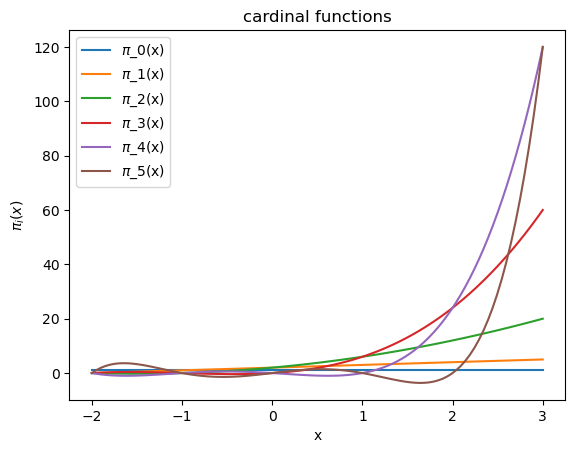

In [86]:
import numpy as np 
import matplotlib.pyplot as plt

xData = np.array([-2, -1, 0, 1, 2, 3], dtype = float)
yData = np.array([1, 4, 11, 16, 13, -4], dtype = float)

def NewtonPolynomial(i, xData, x):
    res = np.ones(np.shape(x))
    for j in range(i):
        res*=(x-xData[j])
    return res

xPlot = np.linspace(min(xData), max(xData), 100)

for j in range(len(xData)):
    plt.plot(xPlot, NewtonPolynomial(j, xData, xPlot), label = '$\pi$_'+str(j)+'(x)')
    plt.xlabel('x')
    plt.title('cardinal functions')
    plt.ylabel('$\pi_i(x)$')
    plt.legend()

## 1. (b) Plot of the interpolating polynomials 

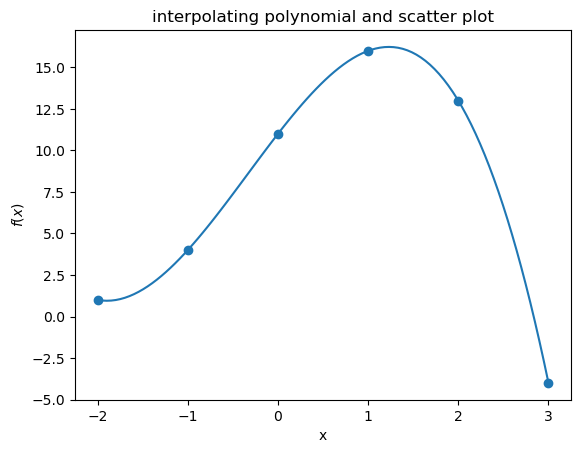

In [88]:
def lagrangeFittingFunction(xData, yData, xPlot):
    
    res = np.zeros(np.shape(xPlot))
    
    for j in range(len(xData)):
        res+=yData[j] * lagrange_Polynomial(j, xData, xPlot)
        
    return res

xPlot = np.linspace(min(xData), max(xData), 100)
yPlot = lagrangeFittingFunction(xData, yData, xPlot)
plt.xlabel('x')
plt.title('interpolating polynomial (lagrange interpolation)')
plt.ylabel('$f(x)$')
plt.plot(xPlot, yPlot)
plt.scatter(xData, yData)

In [91]:
def NewtonCoefficient(xData, yData):
    
    dDiff = np.zeros((len(xData), len(xData)))
    dDiff[:, 0] = yData
    for col in range(1, len(xData)):
        for row in range(col, len(xData)):
            dDiff[row, col] = (dDiff[row, col-1] - dDiff[row-1, col-1])/(xData[row] - xData[row - col])
            
    return dDiff.diagonal()

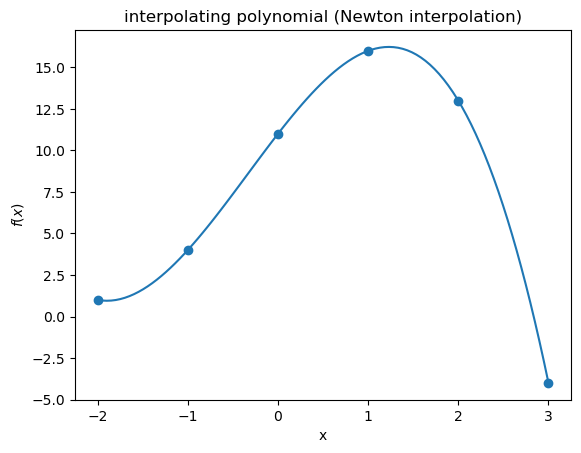

In [93]:
def NewtonFittingFunction(xData, yData, xPlot):
    
    ai = NewtonCoefficient(xData, yData)
    res = np.zeros(np.shape(xPlot))
    
    for j in range(len(xData)):
        res+=ai[j] * NewtonPolynomial(j, xData, xPlot)
        
    return res

xPlot = np.linspace(min(xData), max(xData), 100)
yPlot = NewtonFittingFunction(xData, yData, xPlot)
plt.xlabel('x')
plt.title('interpolating polynomial (Newton interpolation)')
plt.ylabel('$f(x)$')
plt.plot(xPlot, yPlot)
plt.scatter(xData, yData)

## 2. fitting using scipy.interpolate.interp1d function

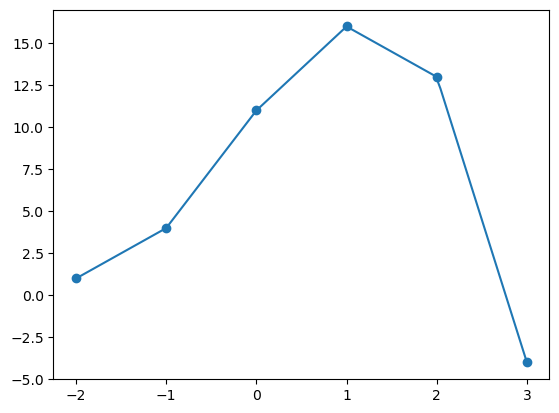

In [100]:
from scipy import interpolate
function = interpolate.interp1d(xData, yData)
xPlot = np.linspace(min(xData), max(xData), 100)
yPlot = function(xPlot)
plt.plot(xPlot, yPlot)
plt.scatter(xData, yData)